<a href="https://colab.research.google.com/github/Tajyu/TensorFlow-Tutotrial/blob/main/Image-Classification/Advanced_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EB%A5%98_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  keras.Sequential 모델을 사용하여 이미지 분류자를 만들고 preprocessing.image_dataset_from_directory를 사용하여 데이터를 로드합니다. 
## 이를 통해 다음 개념을 실제로 경험해 볼 수 있습니다.

### - DataSet를 효율적으로 로드합니다.
### - 데이터 증강 및 Dropout을 포함하여 과적합을 식별하고 이를 완화하는 기술을 적용합니다.

### 이 튜토리얼은 기본적인 머신러닝 워크플로우를 따른다.

### 1. 데이터 검사 및 이해하기
### 2. 입력 파이프라인 빌드하기
### 3. 모델 빌드하기
### 4. 모델 훈련하기
### 5. 모델 테스트하기
### 6. 모델을 개선하고 프로세스 반복하기

### TensorFlow 및 기타 라이브러리 가져오기

In [84]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import  ImageDataGenerator

import matplotlib.pyplot as plt
import numpy as np
import os

## 데이터세트 다운로드 및 탐색하기
### 이 튜토리얼에서는 개와 고양이의 이미지들을 분류한다.

In [85]:
_URL = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
path_to_zip = tf.keras.utils.get_file("cats_and_dogs.zip", origin = _URL, extract = True)
PATH = os.path.join(os.path.dirname(path_to_zip), "cats_and_dogs_filtered")

### 데이터세트의 구조는 train값과 validation값의 폴더로 되어있고 각각 폴더안에 고양이와 개의 데이터세트가 있다.
#### .jpg 파일로 저장되어있다.
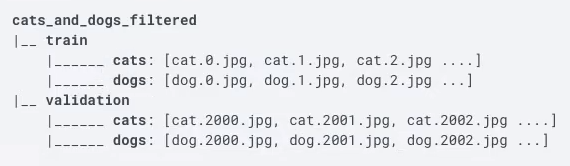


### 디렉토리 경로를 설정해야한다.

In [86]:
train_dir = os.path.join(PATH, "train")
validation_dir = os.path.join(PATH, "validation")

In [87]:
# train: 훈련, validation: 검증
train_cats_dir = os.path.join(train_dir, "cats") # 학습을 할려는 "고양이" 이미지 디렉토리
train_dogs_dir = os.path.join(train_dir, "dogs") # 학습을 할려는 "개" 이미지 디렉토리

validation_cats_dir = os.path.join(validation_dir, "cats") # 검증하기위한 "고양이" 이미지 디렉토리
validation_dogs_dir = os.path.join(validation_dir, "cats") # 검증하기위한 "개" 이미지 디렉토리

## 데이터 확인
### 고양이와 개의 이미지들의 각각 train, validation 디렉토리를 확인

In [88]:
num_cats_tr = len(os.listdir(train_cats_dir)) # 학습 할 "고양이" 이미지의 개수 확인
num_dogs_tr = len(os.listdir(train_dogs_dir)) # 학습 할 "개" 이미지 개수 확인

num_cats_val = len(os.listdir(validation_cats_dir)) # 검증 할 "고양이" 이미지 개수 확인
num_dogs_val = len(os.listdir(validation_dogs_dir)) # 검증 할 "개" 이미지 개수 확인

total_train = num_cats_tr + num_dogs_tr # 전체 학습 할 이미지 수
total_val = num_cats_val + num_dogs_val # 전체 검증 할 이미지 수

### 위의 결과 출력

In [89]:
print("total training cat images: ", num_cats_tr)
print("total training dog images: ", num_dogs_tr)
print("----------------------------------")
print("total validation cat images: ", num_cats_val)
print("total validation dog images: ", num_dogs_val)
print("----------------------------------")
print("total training images: ", total_train)
print("total validation images: ", total_val)

total training cat images:  1000
total training dog images:  1000
----------------------------------
total validation cat images:  500
total validation dog images:  500
----------------------------------
total training images:  2000
total validation images:  1000


### batch 크기, epochs, 이미지 크기 설정

### batch_size: 몇 개의 샘플로 가중치를 갱신할 것인지 지정
### epochs: 학습 반복 횟수

In [127]:
batch_size = 200
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

## 데이터 준비

In [128]:
# 데이터 전처리 과정
train_image_generator = ImageDataGenerator(rescale = 1./255) # 0 ~ 1의 값으로 변경하기위해 255로 나눈다.
validation_image_generator = ImageDataGenerator(rescale = 1./255) # 0 ~ 1의 값으로 변경하기위해 255로 나눈다.

### flow_from_directory: 디렉토리 기준으로 불러온다.
### 폴더를 기준으로 자동으로 라벨링을하여 불러온다.
### -> 그래서 아래는 "고양이"와 "개" 2개의 폴더로 되어있어서 class가 2로 나온다.

In [129]:
train_data_gen = train_image_generator.flow_from_directory(batch_size = batch_size,
                                                           directory = train_dir,
                                                           shuffle = True,
                                                           target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode = "binary") # 고양이와 개 2종류라서 binary

Found 2000 images belonging to 2 classes.


In [130]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size = batch_size,
                                                              directory = validation_dir,
                                                              target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode = "binary") # 고양이와 개 2종류라서 binary

Found 1000 images belonging to 2 classes.


In [131]:
sample_training_images, _ = next(train_data_gen)

In [132]:
sample_training_images.shape

(200, 150, 150, 3)

### 이미지를 보기위해 함수를 생성

In [133]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize = (20, 20)) # 1줄에 5개의 이미지를 20x20 으로 출력
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis("off")
    plt.tight_layout()
    plt.show()

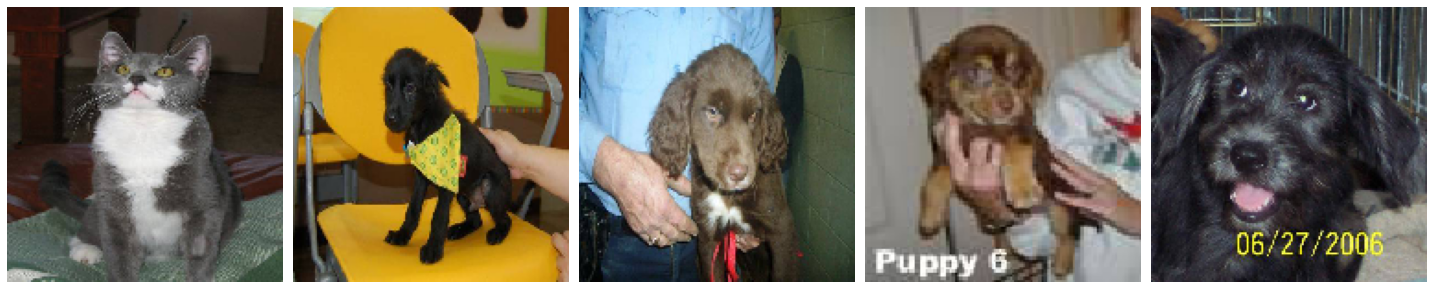

In [134]:
plotImages(sample_training_images[:5]) # 인덱스 값 0 ~ 4까지 출력

## 모델 생성


In [135]:
model = Sequential([
                    Conv2D(16, 3, padding = "same", activation = "relu", input_shape = (IMG_HEIGHT, IMG_WEIGHT, 3)), # RGB 채널이 3개라서 마지막에 "3" / 아래로 갈수록 Conv 값 2배씩 증가
                    MaxPooling2D(),
                    Conv2D(32, 3, padding = "same", activation = "relu"),
                    MaxPooling2D(),
                    Conv2D(64, 3, padding = "same", activation = "relu"),
                    MaxPooling2D(),
                    Flatten(),
                    Dense(512, activation = "relu"),
                    Dense(1)
])

## 모델 컴파일

In [136]:
model.compile(optimizer = "adam",
              loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
              metrics = ["accuracy"])

In [137]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 20736)            

## 생성된 모델로 학습

In [140]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch = total_train // batch_size,
    epochs = epochs,
    validation_data = val_data_gen,
    validation_steps = total_val // batch_size
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
10/10 [==============================] - 8s 832ms/step - loss: 0.6824 - accuracy: 0.5115 - val_loss: 0.6659 - val_accuracy: 0.5480
Epoch 2/15
10/10 [==============================] - 8s 779ms/step - loss: 0.6474 - accuracy: 0.5890 - val_loss: 0.6266 - val_accuracy: 0.6520
Epoch 3/15
10/10 [==============================] - 8s 788ms/step - loss: 0.6146 - accuracy: 0.6235 - val_loss: 0.6047 - val_accuracy: 0.6620
Epoch 4/15
10/10 [==============================] - 8s 775ms/step - loss: 0.5580 - accuracy: 0.6965 - val_loss: 0.6005 - val_accuracy: 0.7020
Epoch 5/15
10/10 [==============================] - 8s 772ms/step - loss: 0.5372 - accuracy: 0.7145 - val_loss: 0.5899 - val_accuracy: 0.6850
Epoch 6/15
10/10 [==============================] - 8s 790ms/step - loss: 0.5096 - accuracy: 0.7335 - val_loss: 0.5403 - val_accuracy: 0.7120
Epoch 7/15
10/10 [==============================] - 8s 782ms/step - loss: 0.4738 - accuracy: 0.7725 - val_loss: 0.5537 - val_accuracy: 0.6930
Epoch 

## 학습된 결과 보기

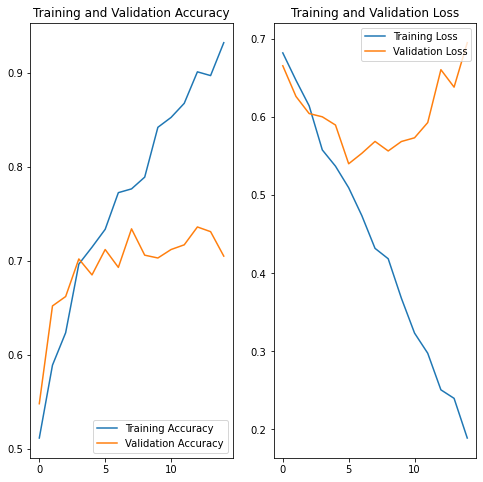

In [147]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs_range = range(epochs)

plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = "Training Accuracy")
plt.plot(epochs_range, val_acc, label = "Validation Accuracy")
plt.legend(loc = "lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label = "Training Loss")
plt.plot(epochs_range, val_loss, label = "Validation Loss")
plt.legend(loc = "upper right")
plt.title("Training and Validation Loss")

plt.show()